In [111]:
import pandas as pd
annot = pd.read_csv('TikTok Airports Data - Gray Man.csv')

In [112]:
annot

filename                                            label
0     gray man demo.png                          Left and right shoulder
1    gray man demo1.png                 Left shoulder and left upper leg
2    gray man demo2.png                                             Back
3    gray man demo3.png                        Right front and back head
4    gray man demo4.png  Right stomach and left upper leg and right foot
..                  ...                                              ...
95  gray man demo95.png   back of neck and right upper leg and left knee
96  gray man demo96.png                            left buttock and back
97  gray man demo97.png            right armpit and left armpit and back
98  gray man demo98.png            right arm and left arm and right foot
99  gray man demo99.png              back of neck and back and left foot

[100 rows x 2 columns]

In [114]:
annot['row_y'] = 0
annot['col_x'] = 105
annot['width']=45
annot['height']=45


In [115]:
annot

filename                                            label  row_y  col_x  width  height
0     gray man demo.png                          Left and right shoulder      0    105     45      45
1    gray man demo1.png                 Left shoulder and left upper leg      0    105     45      45
2    gray man demo2.png                                             Back      0    105     45      45
3    gray man demo3.png                        Right front and back head      0    105     45      45
4    gray man demo4.png  Right stomach and left upper leg and right foot      0    105     45      45
..                  ...                                              ...    ...    ...    ...     ...
95  gray man demo95.png   back of neck and right upper leg and left knee      0    105     45      45
96  gray man demo96.png                            left buttock and back      0    105     45      45
97  gray man demo97.png            right armpit and left armpit and back      0    105     45      45
98  gray man demo98.png            right arm and left arm and right foot      0    105     45      45
99  gray man demo99.png              back of neck and back and left foot      0    105     45      45

[100 rows x 6 columns]

In [116]:
annot['label'] = annot['label'].apply(lambda x: x.replace('foot', 'leg'))
annot['label'] = annot['label'].apply(lambda x: x.lower())
annot['label'] = annot['label'].apply(lambda x: x.replace('back of', ''))
annot['label2'] = annot['label'].copy()
annot['label'] = annot['label2'].apply(lambda x: 'head' in x)

In [117]:
annot2 = annot.copy()
annot2['row_y'] = 92
annot2['col_x'] = 60
annot2['width'] = 31
annot2['height'] = 110
print(annot2)
annot2['label'] = annot2['label2'].apply(lambda x: 'right hand' in x)
annot = pd.concat([annot,annot2])

               filename  label  row_y  col_x  width  height                                          label2
0     gray man demo.png  False     92     60     31     110                         left and right shoulder
1    gray man demo1.png  False     92     60     31     110                left shoulder and left upper leg
2    gray man demo2.png  False     92     60     31     110                                            back
3    gray man demo3.png   True     92     60     31     110                       right front and back head
4    gray man demo4.png  False     92     60     31     110  right stomach and left upper leg and right leg
..                  ...    ...    ...    ...    ...     ...                                             ...
95  gray man demo95.png  False     92     60     31     110          neck and right upper leg and left knee
96  gray man demo96.png  False     92     60     31     110                           left buttock and back
97  gray man demo97.png  Fal

In [125]:
annot.to_parquet('gray_man_demo_2/vl_annotations_images.parquet')

OSError: Cannot save file into a non-existent directory: 'gray_man_demo_2'

In [119]:
annot.to_parquet('gray_man_demo_2/vl_annotations_objects.parquet')

In [123]:
import fastdup
fd = fastdup.create(input_dir='/Users/dannybickson/Downloads/gray_man_demo_2/', work_dir='out')
fd.run(annotations=annot.copy(),ccthreshold=0.998,overwrite=1, model_path='dinov2s')

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-09-10 08:54:24 [INFO] Found resent/efficientnet/dinov2 model, setting up normalization
2023-09-10 08:54:24 [INFO] Going to loop over dir /var/folders/4m/17tfvm293lg5scctpk1cd2940000gn/T/tmp6vv4sfwp.csv
2023-09-10 08:54:24 [INFO] Found total 200 images to run on, 200 train, 0 test, name list 200, counter 200 
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.utes
2023-09-10 08:54:30 [INFO] Found resent/efficientnet/dinov2 model, setting up normalization
2023-09-10 08:54:30 [INFO] Going to loop over dir /var/folders/4m/17tfvm293lg5scctpk1cd2940000gn/T/crops_input.csv
2023-09-10 08:54:30 [INFO] Found total 200 images to run on, 200 train, 0 test, name list 200, counter 200 
2023-09-10 08:54:35 [INFO] Found total 200 images to run onstimated: 0 Minutes
2023-09-10 08:54:35 [INFO] 157) Finished write_index() NN model
2023-09-10 08:54:35 [INFO] Stored nn model index file out/nnf.index
2023-

0

False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 167.05it/s]

Finished OK. Components are stored as image files out/galleries/components_[index].jpg
Stored components visual view in  out/galleries/components.html
Execution time in seconds 0.1
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



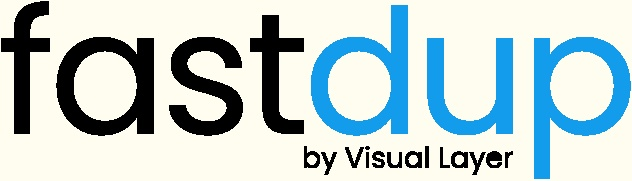
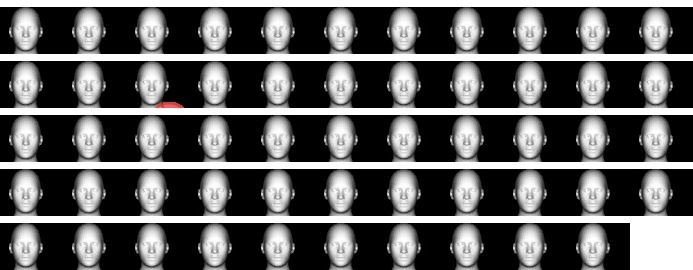
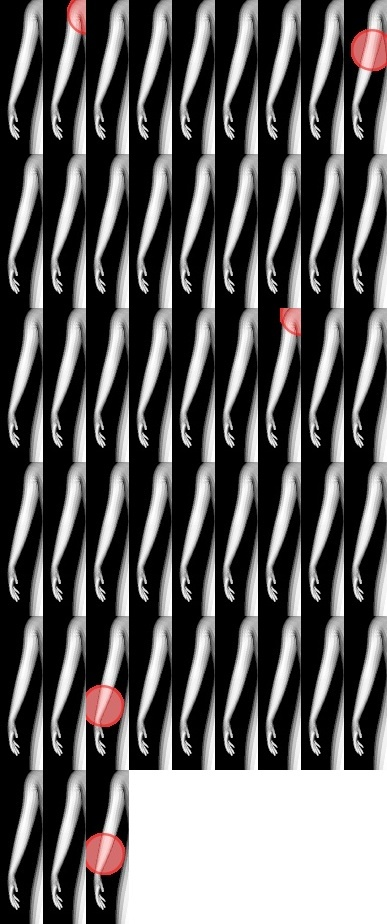
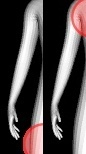

0

In [124]:
fd.vis.component_gallery()


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 21350.49it/s]

Stored outliers visual view in  out/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



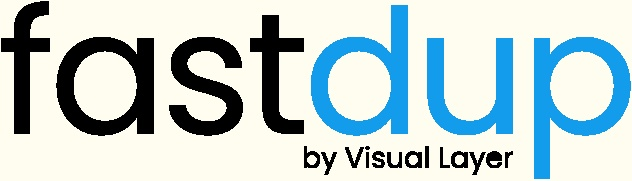
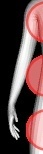
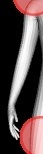
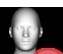
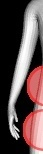
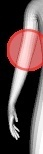
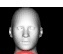
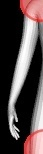
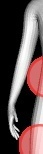
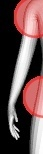
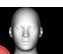
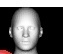
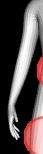
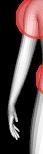
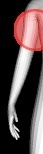
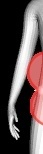
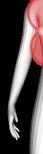
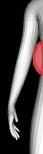
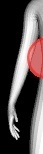
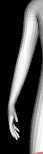
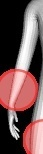

0

In [122]:
fd.vis.outliers_gallery()